# 2주차 과제_0314(금)

핸즈온 7장 앙상블 학습과 랜덤 포레스트 p.257 - 272

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# import package
import numpy as np
import os

#5장에서 소개한 moons dataset 불러오기
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X,y = make_moons(n_samples=100, noise=0.15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 7.5 부스팅

**부스팅** : 약한 학습기를 여러 개 연결하여 강한 학습기를 만드는 앙상블 방법

### 7.5.1 에이다부스트

이전 모델이 과소적합했던 훈련 샘플의 가중치를 더 높여 학습하기 어려운 샘플에 점점 더 맞춰진 새로운 예측기를 만드는 법

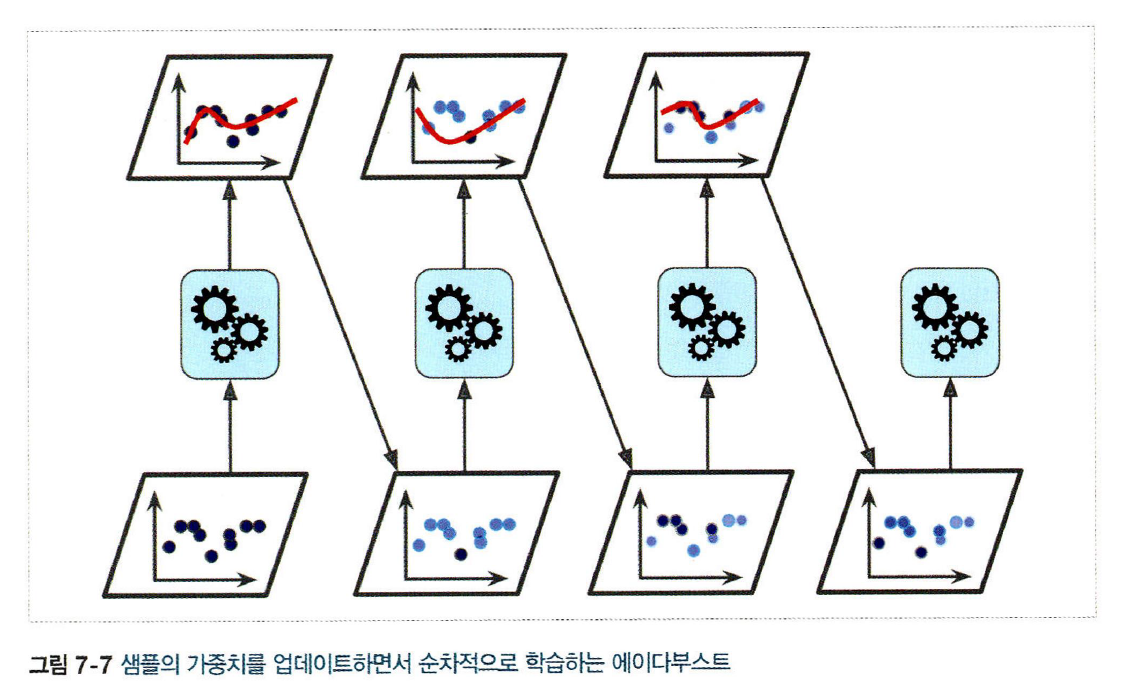


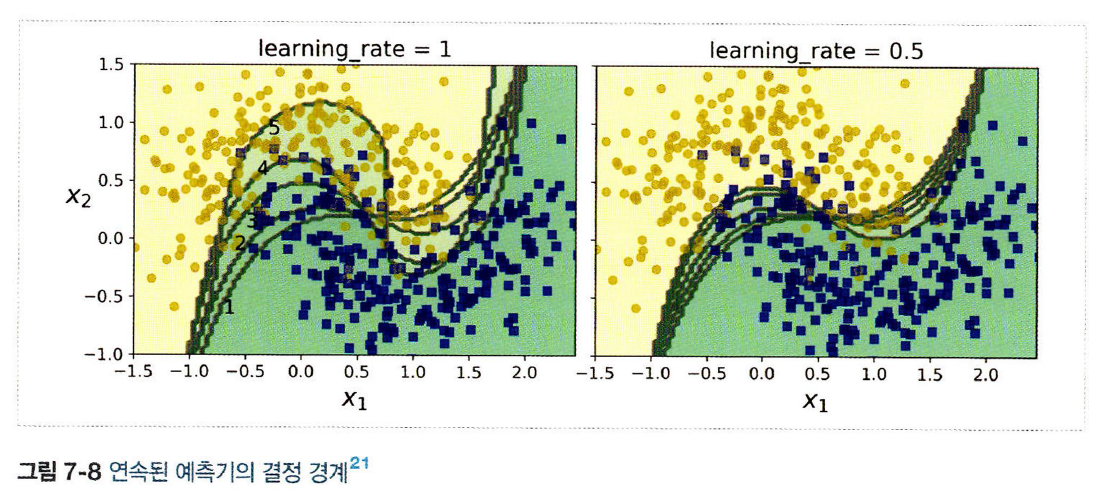

비용 함수 최소화를 위해 한 예측기의 모델 파라미터를 조정하는 경사 하강법과는 다르게 에이다부스트는 점차 더 좋아지도록 앙상블에 예측기를 추가함

모든 예측기가 훈련을 마치면 이 앙상블은 배깅이나 페이스팅과 비슷한 방식으로 예측을 만듬. 하지만 가중치가 적용된 훈련 세트의 전반적인 정확도에 따라 예측기마다 다른 가중치가 적용됨

**$j$번째 예측기의 가중치가 적용된 에러율**

$r_j = \frac{\displaystyle\sum_{i=1}^m w^{(i)}\\\hat y_j^{(i)} \neq y^{(i)}}{\displaystyle\sum_{i=1}^m w^{(i)}}$ 여기서 $\hat y_j^{(i)} $는 $i$번째 샘플에 대한 $j$번째 예측기의 예측

- 각 샘플 가중치 $w^{(i)}$는 초기에 $\frac{1}{m}$로 초기화 됨
- 첫 번째 예측기가 학습되고 가중치가 적용된 에러율 $r_1$이 훈련 세트에 대해 계산됨

**예측기 가중치**

$\alpha_j = \eta log\frac{1-r_j}{r_j}$

- $\eta$ : 학습률 하이퍼파라미터
- 예측기가 정확할수록 가중치가 더 높아짐
    
    무작위로 예측하는 정도 : 가중치는 0에 가까울 것

    무작위 추측보다 정확도가 낮은 경우 : 가중치는 음수가 됨



**가중치 업데이트 규칙**

$w^{(i)} \leftarrow
\begin{cases}
w^{(i)}, & \hat{y}_j^{(i)} = y^{(i)} \text{일 때} \\
w^{(i)} \exp(\alpha_j), & \hat{y}_j^{(i)} \neq y^{(i)} \text{일 때}
\end{cases}$

여기서 $i = 1,2,\cdots,m$

- 위의 식을 사용해 샘플의 가중치를 업데이트함

- 그 다음 모든 샘플의 가중치를 정규화함

- 마지막으로 새 예측기가 업데이트된 가중치를 사용해 훈련되고 전체 과정이 반복됨

- 이 알고리즘은 지정된 예측기 수에 도달하거나 완벽한 예측기가 만들어지면 중지됨

**에이다부스트 예측**

$
\hat{y}(\mathbf{x}) = {\arg\max_k} {\displaystyle\sum_{j=1}^{N} \alpha_j \\ _{\hat{y}_j(\mathbf{x}) = k}}
$ ,  여기서 $N$은 예측기 수

- 에이다부스트는 단순히 모든 예측기의 예측을 계산하고 예측기 가중치 \alpha_j$를 더해 예측 결과를 만듬

- 가중치 합이 가장 큰 클래스가 예측 결과가 됨

In [ ]:
# 사이킷런의 AdaBoostClassifier를 사용하여 200개의 아주 얕은 결정 트리르 기반으로 하는 예이다부스트 분류기를 훈련시키는 코드
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1), n_estimators=200,
    algorithm='SAMME', learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

### 7.5.2 그레이디언트 부스팅

**그레이디언트 부스팅**

앙상블에 이전까지의 오차를 보정하도록 예측기를 순차적으로 추가하면서 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습시키는 방법



In [ ]:
# 그레이디언트 트리 부스팅
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor를 훈련 세트에 학습
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

# 첫 번째 예측기에서 생긴 잔여 오차에 두 번째 DecisionTreeRegressor 훈련시키기
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

# 두 번째 예측기가 만든 잔여 오차에 세 번쨰 회귀 모델 훈련시키기
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

# 새로운 샘플에 대한 예측을 만들기 위해 모든 트리의 예측을 더함
# y_pred = sum(tree.predict(X_new) for tree in(tree_reg1, tree_reg2, tree_reg3))

DecisionTreeRegressor(max_depth=2)

In [ ]:
# GradientBoostingRegressor를 사용해 GBRT 앙상블 간단히 훈련시키기
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

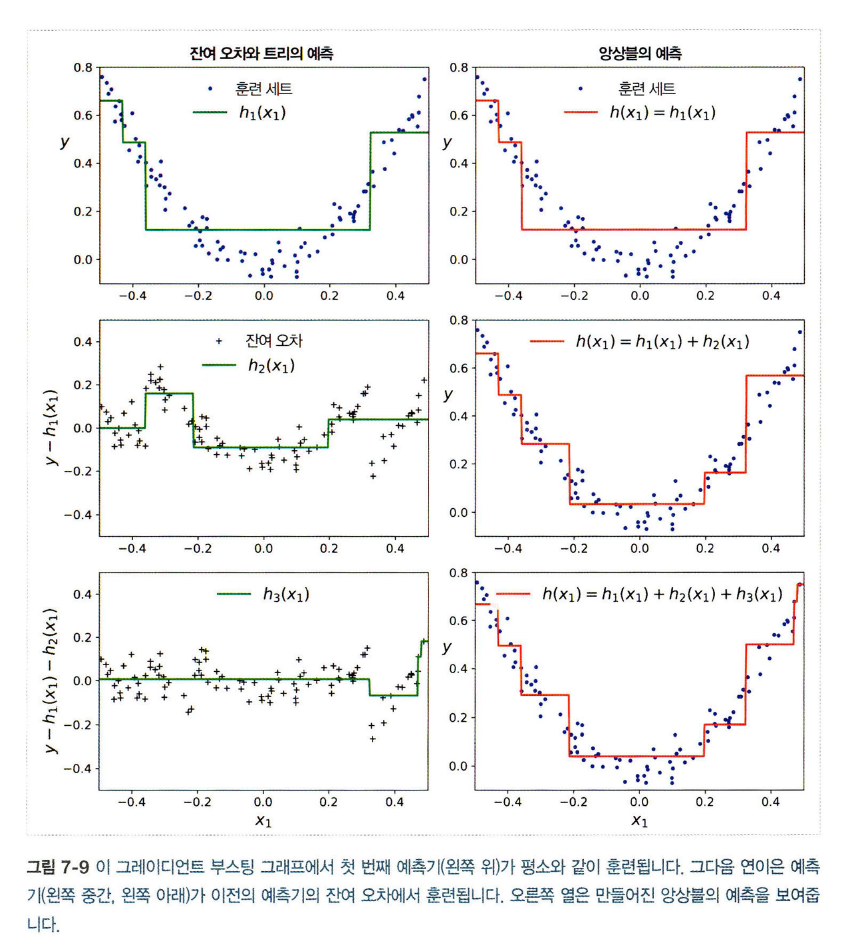

**축소** : 각 트리의 기여 정도를 조절하는 learning_rate를 낮게 설정하는 규제 방법

앙상블을 훈련 세트에 학습시키기 위해 많은 트리가 필요하지만 일반적으로 에측의 성능은 좋아짐

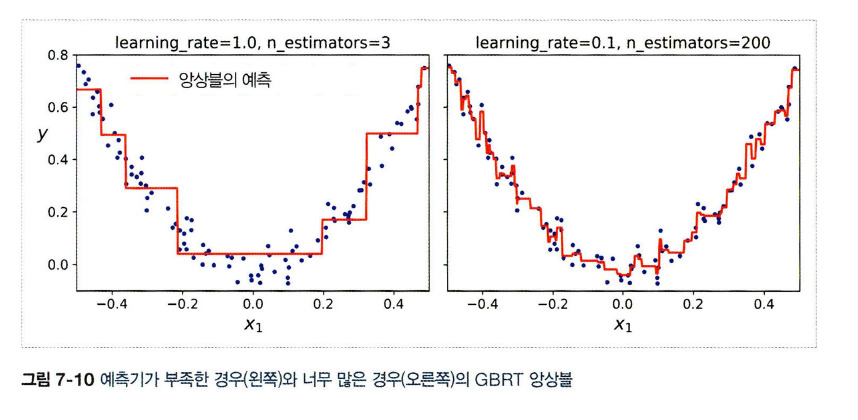

In [ ]:
# 최적의 트리 수를 찾기 위해 조기 종료 기법 사용
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)


GradientBoostingRegressor(max_depth=2, n_estimators=16)

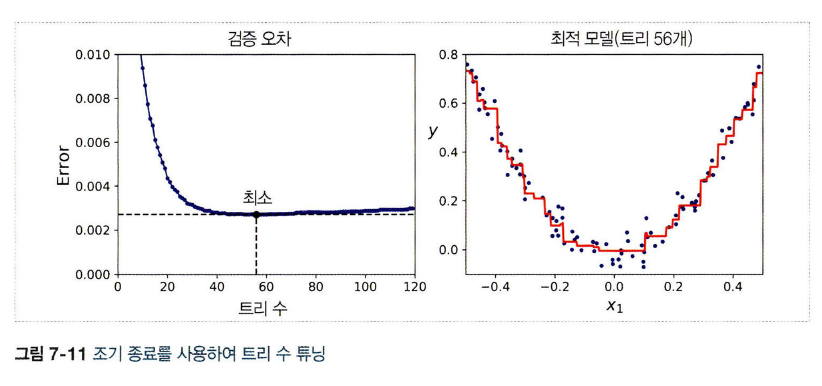

In [ ]:
# 연속해서 다섯 번의 반복 동안 검증 오차가 향상되지 않으면 훈련을 멈추는 코드
gdrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float('inf')
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # 조기 종료

**확률적 그레이디언트 부스팅** : 각 트리가 훈련할 때 사용할 훈련 샘플의 비율을 지정할 수 있는 subsample 매개변수를 지정하는 것

In [ ]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [ ]:
# XGBoost 자동 조기 종료 기능 제공
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds = 2)
xgb_reg.fit(X_train, y_train,
            eval_set = [(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)

[0]	validation_0-rmse:0.41041
[1]	validation_0-rmse:0.36735
[2]	validation_0-rmse:0.32042
[3]	validation_0-rmse:0.30120
[4]	validation_0-rmse:0.29389
[5]	validation_0-rmse:0.30380
[6]	validation_0-rmse:0.29775


## 7.6 스태킹

기본 아이디어 : '앙상블에 속한 모든 예측기의 예측을 취합하는 간단한 함수를 사용하는 대신 취합하는 모델을 훈련시킬 수 없을까?'

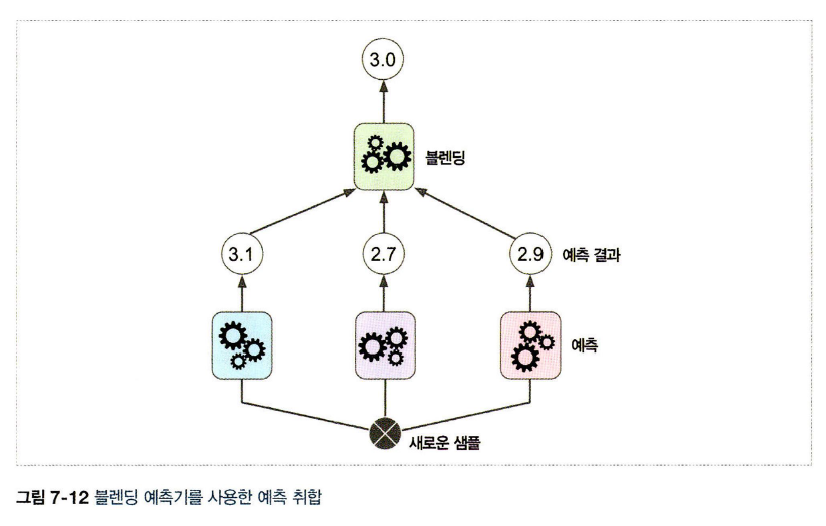

세 예측기는 각각 다른 값을 예측하고 마지막 예측기(블렌더)가 이 예측을 입력으로 받아 최종 예측을 만듬

블렌더를 학습시키는 일반적인 방법 : 홀드 아웃 세트 사용하는 것

1. 훈련 세트를 두 개의 서브셋으로 나눔

2. 첫 번째 서브셋은 첫 번째 레이어의 예측을 훈련시키기 위해 사용됨

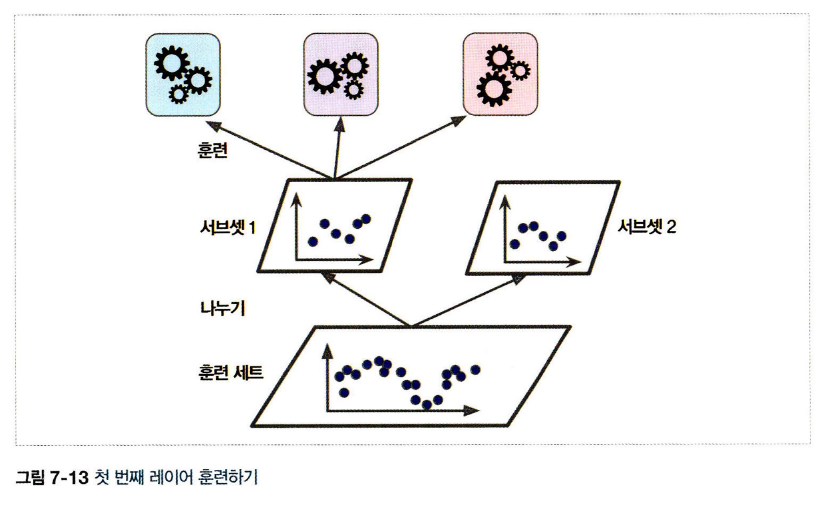

3. 첫 번째 레이어의 예측기를 사용해 두 번째(홀드 아웃) 세트에 대한 예측을 만듬

    ↪ 처음 보는 샘플들을 사용하여 완전히 새로운 예측 도출 가능

4. 홀드 아웃 세트의 각 샘플에 대해 세 개의 예측값이 있을 때, 타깃값은 그대로 쓰고 앞에서 예측한 값을 입력 특성으로 사용하는 새로운 훈련 세트를 만듬

5. 블렌더가 새 훈련 세트로 훈련되어 첫 번째 레이어의 예측을 가지고 타깃값을 예측하도록 학습됨

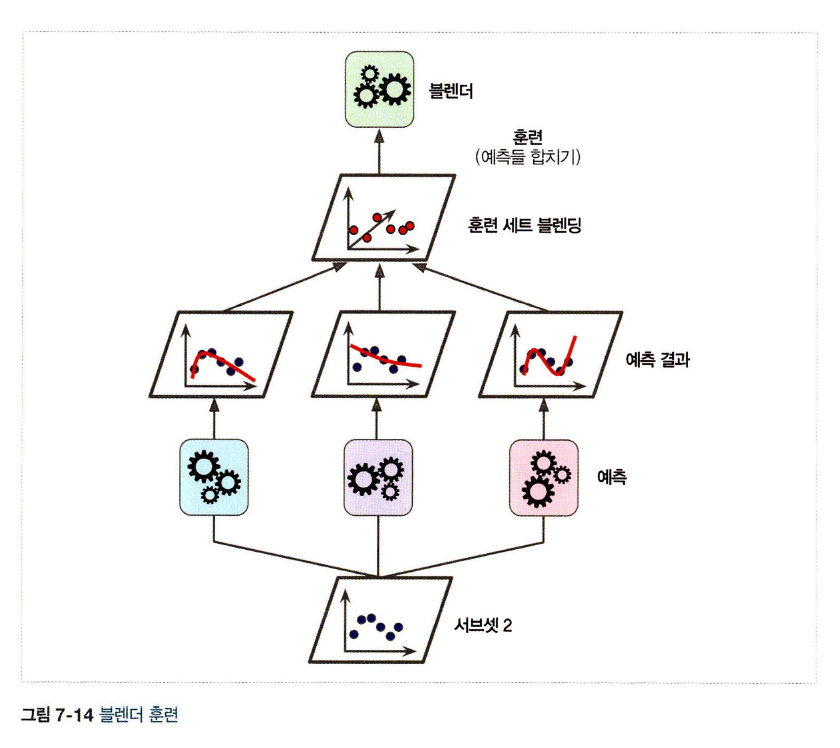

여러 개의 블렌더를 훈련시키는 것도 가능함

↪ 블렌더만의 레이어가 만들어짐

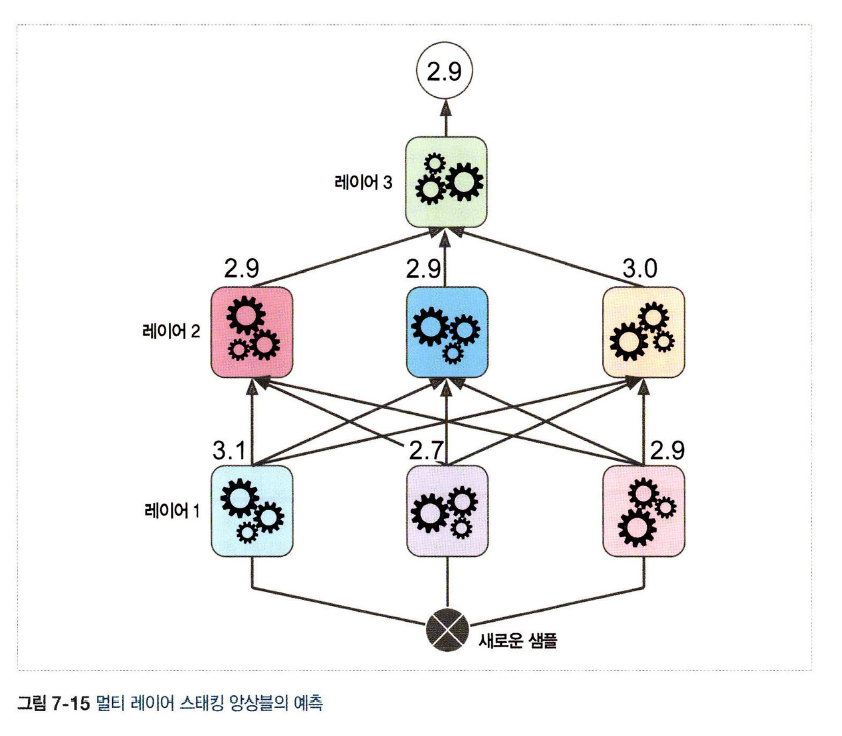